In [1]:
import numpy as np
import pandas as pd
import csv
import random
import math
from datetime import datetime
import matplotlib.pyplot as plt

temp_mse_values = []
mse_values = []
all_mse_values = []

# Считывание данных из файла и их подготовка

In [2]:
def getBdate(bdate):
  return datetime.strptime(bdate, '%d.%m.%Y').month

## Студенты

In [3]:
# drop_column = ['№п/п', 'Основание поступления']
# gender_dict = {'Мужской': 1,'Женский': 0}

# # количество признаков входного слоя
# feature_count = 9

# # подготовленный датасет
# train_data = []
# # датасет для тестирования
# test_data = []

# df = pd.read_csv('data/input.csv', sep=',')
# df.drop(drop_column, axis = 1, inplace = True)

# # переводим пол в числовой формат, т. к. это будет один из признаков
# df['Пол'].replace(gender_dict, inplace = True) 

# # приводим баллы по ЕГЭ к диапозону от 0 до 1
# df.astype({'Баллы ЕГЭ': 'float'}).dtypes
# df['Баллы ЕГЭ'] /= 100
    
# fios = df['ФИО'].unique()
# subjects = df['Предметы ЕГЭ'].unique()
# cities = df['Населенный пункт по прописке'].unique()
# schools = df['Учебное заведение'].unique()
# classes = df['Специальность/направление'].unique()

# for el in fios:
#     student = df[df['ФИО'] == el]
#     features = np.zeros((feature_count))
#     for i in range(len(subjects)):
#         res = student.loc[student['Предметы ЕГЭ'] == subjects[i], 'Баллы ЕГЭ'].values
#         features[i] = res[0] if len(res) else 0
#     features[5] = student.iloc[0]['Пол']
#     features[6] = getBdate(student.iloc[0]['Дата рождения']) / 12
    
#     city_index = np.where(cities == student.iloc[0]['Населенный пункт по прописке'])[0]
#     features[7] = 0 if len(city_index) == 0 else city_index[0]/len(cities)
    
#     school_number = np.where(schools == student.iloc[0]['Учебное заведение'])[0]
#     features[8] = 0 if len(school_number) == 0 else school_number[0]/len(schools)
    
#     # Нормализация входного вектора
# #     norm_features = np.zeros((feature_count))
# #     for i in range(len(features)):
# #         sum = 0 
# #         for j in range(len(features)):
# #             sum += features[j] ** 2
# #         norm_features[i] = features[i] / math.sqrt(sum)
#     norm_features = (features * features.mean()) / features.std()
    
#     res = np.zeros((len(classes)))
#     res[np.where(classes == student.iloc[0]['Специальность/направление'])[0].item(0)] = 1
    
    
    
#     # Нормализованные
#     temp_data = dict(fio = el, features = norm_features, result = res)
#     # Не нормализованные
#     #temp_data = dict(fio = el, features = features, result = res)
    
#     # 90% - train, 10% - test
#     if (len(train_data) / len(fios)) < 0.9:
#         train_data.append(temp_data)
#     else:
#         train_data.append(temp_data)
#         test_data.append(temp_data)

## Студенты (информатика)

In [4]:
# # подготовленный датасет
# train_data = []
# # датасет для тестирования
# test_data = []

# drop_column = ['№п/п', 'Основание поступления']
# gender_dict = {'Мужской': 1,'Женский': 0}

# df = pd.read_csv('data/input.csv', sep=',')
# df.drop(drop_column, axis = 1, inplace = True)

# # переводим пол в числовой формат, т. к. это будет один из признаков
# df['Пол'].replace(gender_dict, inplace = True) 

# # приводим баллы по ЕГЭ к диапозону от 0 до 1
# df.astype({'Баллы ЕГЭ': 'float'}).dtypes
# df['Баллы ЕГЭ'] /= 100

# # Смотрим только для информатики
# fios = df.loc[df['Предметы ЕГЭ'] == 'Информатика и ИКТ', 'ФИО']
# classes = df.loc[df['Предметы ЕГЭ'] == 'Информатика и ИКТ', 'Специальность/направление'].unique()
# subjects = df.loc[df['Специальность/направление'].isin(classes), 'Предметы ЕГЭ'].unique()

# # количество признаков входного слоя
# feature_count = len(subjects) + 1

# for el in fios:
#     student = df[df['ФИО'] == el]
#     features = np.zeros((feature_count))
#     for i in range(len(subjects)):
#         res = student.loc[student['Предметы ЕГЭ'] == subjects[i], 'Баллы ЕГЭ'].values
#         features[i] = res[0] if len(res) else 0
#     features[len(subjects)] = student.iloc[0]['Пол']
    
#     # Нормализация входного вектора
#     norm_features = np.zeros((feature_count))
#     for i in range(len(features)):
#         sum = 0 
#         for j in range(len(features)):
#             sum += features[j] ** 2
#         norm_features[i] = features[i] / math.sqrt(sum)
    
#     res = np.zeros((len(classes)))
#     res[np.where(classes == student.iloc[0]['Специальность/направление'])[0][0]] = 1
    
#     # Нормализованные
#     temp_data = dict(fio = el, features = norm_features, result = res)
#     # Не нормализованные
# #     temp_data = dict(fio = el, features = features, result = res)
    
#     # 90% - train, 10% - test
#     if (len(train_data) / len(fios)) < 0.9:
#         train_data.append(temp_data)
#     else:
#         test_data.append(temp_data)

## Ирис

In [5]:
# количество признаков входного слоя
feature_count = 4

df = pd.read_csv('data/iris.csv', sep=',')

# подготовленный датасет
train_data = []
# датасет для тестирования
test_data = []

classes = df["variety"].unique()

df = df.sample(frac=1).reset_index(drop=True)

for i in range(len(df)) : 

    features = np.zeros((feature_count))
    features[0] = df.loc[i, "sepal.length"]
    features[1] = df.loc[i, "sepal.width"]
    features[2] = df.loc[i, "petal.length"]
    features[3] = df.loc[i, "petal.width"]
    
    # Нормализация входного вектора
    norm_features = features/np.linalg.norm(features)
    
    res = np.zeros((len(classes)))
    res[np.where(classes == df.loc[i, "variety"])[0].item(0)] = 1
    
    temp_data = dict(name = str(i), 
                     features = norm_features, 
                     result = res)
    
    if (len(train_data) / len(df)) < 0.9:
        train_data.append(temp_data)
#         test_data.append(temp_data)
    else:
#         train_data.append(temp_data)
        test_data.append(temp_data)

# Обучение

## Кохонен

### Методы для обучения

In [6]:
def getKohonenWinnerIndex(x, neuron_counts, w, s):
    result = 0
    max_net = -1
    for i in range(neuron_counts):
        net = 0
        for j in range(len(x)):
            net += x[j] * w[j][i] * s[i]
        if (net > max_net):
            result = i
            max_net = net
    return result

def getKohonenNormResult(x, neuron_counts, w):
    result = np.zeros((neuron_counts))
    max_index = 0
    max_net = -1
    
    for i in range(neuron_counts):
        net = 0
        for j in range(len(x)):
            net += (x[j]+0.001) * w[j][i]
        if (net > max_net):
            max_index = i
            max_net = net
        result[i] = net
    
    summ = 0
    for i in range(neuron_counts):
        if i != max_index:
            summ += result[i] ** 2
    divider = math.sqrt(summ)
    
    for i in range(neuron_counts):    
        if i != max_index:
            result[i] /= divider
    
    result[max_index] = 1
    return result

def getNeuronNet(x, w):
    result = 0
    for i in range(len(x)):
        result += x[i] * w[i]
    return result

### Инициализация параметров обучения

In [7]:
# скорость обучения слоя Кохонена
# лучший результат для студентов theta = 0.7
# лучший результат для студентов (информатика) theta = 0.7
# лучший результат для ирисок theta = 0.7
theta = 0.7
# лучший результат для студентов kohonen_neuron_count = 15
# лучший результат для студентов (информатика) kohonen_neuron_count = 30
# лучший результат для ирисок kohonen_neuron_count = 15
kohonen_neuron_count = 15
# штрафы кластеров
s_w = np.ones((kohonen_neuron_count))
# количество эпох
# лучший результат для студентов epoch_count = 10
# лучший результат для студентов (информатика) epoch_count = 100
# лучший результат для ирисок epoch_count = 20
epoch_count = 20

#инициализация начальных весов слоя Кохонена kohonen_w[x][y]
# x - индекс нейрона входного слоя
# y - индекс нейрона слоя Кохонена
kohonen_w = np.random.uniform(-1, 1, (feature_count, kohonen_neuron_count))

# Коэффициент изменение скорости обучения
# 0.1 для студентов
# 0.0003 для студентов (информатика)
# 0.0003 для ирисок
thetaSpeed = 0.0003

# Штраф за победу нейрона
# 0.9 для студентов
# 0.995 для студентов (информатика)
# 0.995 для ирисок
fine = 0.995

### Обучение слоя Кохонена

In [8]:
step = epoch_count * len(train_data)
# Обучение на подготовленном датасете
while step >= 0:
    
    student = train_data[random.randint(0, len(train_data) - 1)]
    
    # Определение нейрона победителя
    winner_index = getKohonenWinnerIndex(student['features'], kohonen_neuron_count, kohonen_w, s_w)
    # Увеличиваем штраф, уменьшая его коэффициент
    s_w[winner_index] *= fine
    # Корректировка весов нейрона победителя на слое Кохонена
    for i in range(feature_count):
        kohonen_w[i][winner_index] += theta * (student['features'][i] - kohonen_w[i][winner_index])
    # Изменение скорости обучения
    theta -= (theta * thetaSpeed)
    step -= 1

## Перцептрон

### Методы для обучения

In [9]:
def activation(net):
    return 1.0/(1 + np.exp(-net))

def logistic_deriv(x):
    return activation(x) * (1 - activation(x))

def mse(pred, actual):
    return np.square(np.subtract(actual,pred)).mean()

def mse_deriv(pred, actual):
    return -(2/len(pred)) * np.subtract(actual,pred).sum()

def mse_deriv_private(pred, actual):
    return -2 * (actual - pred)

def get_vector_length(vector):
    return math.sqrt(np.square(vector).sum())

### Инициализация параметров обучения

In [10]:
# Обучение перцептрона
# 30 для студентов
# 30 для студентов (информатика)
# 20 для ирисок
epoch_count = 15

per_input_neuron_count = kohonen_neuron_count
# per_input_neuron_count = len(train_data[0]['features'])

# количество скрытых слоев
# 1 для студентов
# 1 для студентов (информатика)
# 1 для ирисок
hiden_layer_count = 1

output_neuron_count = len(train_data[0]['result'])

# количество нейронов в слоях, последний слой выходной, первый - входной
# 25 для студентов
# 25 для студентов (информатика)
# 25 для ирисок
neuron_count = [per_input_neuron_count, 25, output_neuron_count]
max_neuron_count = np.max(neuron_count)
layers_count = len(neuron_count)

# скорость обучения
# 0.7 для студентов
# 0.4 для студентов (информатика)
# 0.4 для ирисок
beta = 0.4

# Кэффициент изменение скорости обучения
# для студентов betaSpeed = 0.0009
# для студентов (информатика)  betaSpeed = 0.0005
# для ирисок betaSpeed = 0.0009
betaSpeed = 0.1

### Обучение перцептрона

In [11]:
#инициализация начальных весов Перцептрона weights[l][x][y]
# l - индекс слоя (слои считаются с первого скрытого слоя)
# x - индекс нейрона от которого идёт вес
# y - индекс нейрона к которому идёт вес
weights = np.random.uniform(-1, 1, (layers_count - 1, max_neuron_count, max_neuron_count))
new_weights = np.zeros((layers_count - 1, max_neuron_count, max_neuron_count))

# до активации нейронов preActiv[x][y]. Начинает с первого скрытого слоя
# x - индекс слоя (слои считаются с первого скрытого слоя)
# y - индекс нейрона в слое
preActiv = np.zeros((layers_count - 1, max_neuron_count))

# после активациии нейронов postActiv[x][y]
# x - индекс слоя (слои считаются с входного слоя)
# y - индекс нейрона в слое
postActiv = np.zeros((layers_count, max_neuron_count))

# для вычисления производной postActivDeriv[x][y]
# x - индекс слоя (слои считаются с входного слоя)
# y - индекс нейрона в слое
postActivDeriv = np.zeros((layers_count, max_neuron_count))

# ошибка на нейроне
# x - индекс слоя (слои считаются с входного слоя)
# y - индекс нейрона в слое
err = np.zeros((layers_count, np.max(neuron_count[1:len(neuron_count)])))

for ep in range(epoch_count):
    print('Epoch ' + str(ep))
    for el in range(len(train_data)):
    
        # получаем нормализованный входной вектор со слоя Кохонена
        student = train_data[el]
        train_el = getKohonenNormResult(student['features'], kohonen_neuron_count, kohonen_w)

#         # подаем на вход датасет
#         student = train_data[el]
#         student = train_data[random.randint(0, len(train_data) - 1)]
#         train_el = student['features']
    
        # Подготовка входного вектора
        for i in range(len(train_el)):
            postActiv[0][i] = train_el[i]

        # Прямое распространение
        for l in range(layers_count - 1):
            for n_c in range(neuron_count[l + 1]):
                preActiv[l][n_c] = np.dot(postActiv[l][0:neuron_count[l]], weights[l][0:neuron_count[l],n_c])
                postActiv[l+1][n_c] = activation(preActiv[l][n_c])
                postActivDeriv[l+1][n_c] = logistic_deriv(preActiv[l][n_c])
            
                
        # Общая ошибка сети
        err_common = mse(postActiv[layers_count-1][0:len(student['result'])], student['result'])
        
        
        # Вычисляем производную от функции ошибки на каждом нейроне выходного слоя
        for n_c in range(neuron_count[layers_count - 1]):
            err[layers_count - 2][n_c] = mse_deriv_private(postActiv[layers_count-1][n_c], student['result'][n_c])
        
        # Изменение последнего слоя весов (веса от последнего скрытого слоя к выходному слою)
        # in_c - индекс нейрона входного слоя
        # out_c - индекс нейрона выходного слоя
        for in_c in range(neuron_count[layers_count - 2]):
            # Производная от взвешенного значения приходящего на нейрон выходного слоя по вычисляемому весу
            # т. е. значение нейрона последнего скрытого слоя после функции активации
            c = postActiv[layers_count-2][in_c]
            for out_c in range(neuron_count[layers_count - 1]):
                # Значение производной от функции ошибки на нейроне выходного слоя
                a = err[layers_count - 2][out_c]
                # Значение производной от функции активации на нейроне выходного слоя
                b = postActivDeriv[layers_count-1][out_c]
                # Старое значение веса
                w = weights[layers_count - 2][in_c, out_c]
                new_weights[layers_count - 2][in_c, out_c] = w - beta * a * b * c
        
        if hiden_layer_count > 0:
            # Индексы слоев в обратную сторону
            for l in range(layers_count - 3, -1, -1):
                # Индексы нейронов от которых идет вес
                for in_c in range(neuron_count[l]):
                    # Производная от функции активации следующего слоя
                    c = postActiv[l-1][in_c]
                    # Индексы нейронов к которым идет вес
                    for out_c in range(neuron_count[l + 1]):
                        # Ошибка идущая на предыдущий слой
                        for out_out_c in range(neuron_count[l + 2]):
                            a1 = err[l + 2][out_out_c]
                            a2 = postActivDeriv[l+2][out_out_c]
                            a3 = weights[l+1][out_c][out_out_c]
                            err[l+1][out_c] += a1 * a2 * a3
                        a = err[l+1][out_c]
                        # Производная от функции активации предыдущего слоя
                        b = postActivDeriv[l+1][out_c]
                        # Старое значение веса
                        w = weights[l][in_c, out_c]
                        new_weights[l][in_c, out_c] = w - beta * a * b * c
        
        weights = new_weights.copy()
        temp_mse_values.append(err_common)
        all_mse_values.append(err_common)
    
    # Изменение скорости обучения
    beta -= (beta * betaSpeed)
    
    mse_values.append(np.array((temp_mse_values)).mean())
    print('MSE mean: ' + str(np.array((temp_mse_values)).mean()))
    print('beta: ' + str(beta))
    temp_mse_values = []

Epoch 0
MSE mean: 0.24489218631885076
beta: 0.36
Epoch 1
MSE mean: 0.17114348140743957
beta: 0.324
Epoch 2
MSE mean: 0.12379257288183339
beta: 0.2916
Epoch 3
MSE mean: 0.0967310522456468
beta: 0.26244
Epoch 4
MSE mean: 0.08042685245676327
beta: 0.23619600000000002
Epoch 5
MSE mean: 0.06986905626228258
beta: 0.2125764
Epoch 6
MSE mean: 0.06259944998920769
beta: 0.19131876
Epoch 7
MSE mean: 0.05735441660265591
beta: 0.172186884
Epoch 8
MSE mean: 0.053433723713470424
beta: 0.15496819560000002
Epoch 9
MSE mean: 0.05042132719282163
beta: 0.13947137604
Epoch 10
MSE mean: 0.04805562924721703
beta: 0.12552423843600002
Epoch 11
MSE mean: 0.04616449923543838
beta: 0.11297181459240002
Epoch 12
MSE mean: 0.04463032658013687
beta: 0.10167463313316003
Epoch 13
MSE mean: 0.04337009602657068
beta: 0.09150716981984403
Epoch 14
MSE mean: 0.0423235234893004
beta: 0.08235645283785963


## График изменения среднеквадратической ошибки от поколения

15


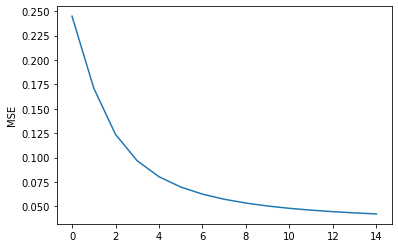

In [12]:
print(len(mse_values))
plt.plot(mse_values)
plt.ylabel('MSE')
plt.show()

# Тестирование

## Тестирование студентов

In [13]:
# # Тестирование перцептрона

# # до активации нейронов preActiv[x][y]
# # x - индекс слоя (слои считаются с первого скрытого слоя)
# # y - индекс нейрона в слое
# preActiv = np.zeros((len(neuron_count) - 1, max_neuron_count))
# # после активациии нейронов postActiv[x][y]
# # x - индекс слоя (слои считаются с входного слоя)
# # y - индекс нейрона в слое
# postActiv = np.zeros((len(neuron_count), max_neuron_count))
    
# y_pred = 0
# y_real = len(test_data)
# accuracy = 0
# for el in range(len(test_data)):
   
#     # получаем нормализованный входной вектор со слоя Кохонена
#     student = test_data[el]
#     test_el = getKohonenNormResult(student['features'], kohonen_neuron_count, kohonen_w)    

#     # подаем на вход интересующее значение
# #     student = test_data[el]
# #     test_el = student['features']

#     for i in range(len(test_el)):
#         postActiv[0][i] = test_el[i]

#     # Проходим по всем слоям
#     for l in range(len(neuron_count) - 1):
#         for n_c in range(neuron_count[l + 1]):
#             preActiv[l][n_c] = np.dot(postActiv[l][0:neuron_count[l]], weights[l][0:neuron_count[l],n_c])
#             postActiv[l+1][n_c] = activation(preActiv[l][n_c])    

#     print(student['fio'])
#     print('Поступил на специальность: ' + classes[np.where(student['result'] == 1)[0][0]])
#     print('Результаты нейросети:')
#     result = postActiv[len(neuron_count)-1][0:len(student['result'])]
    
    
#     best_results = [0.0, 0.0, 0.0]
#     best_indexes = [0, 1, 2]
#     max_res = 0.0
#     max_index = 0
#     for i in range(len(result)):
# #         print(classes[i] + ' - ' + str(result[i] * 100) + '%')
# #         print('-------------')
#         if (result[i] > best_results[0]):
#             best_results[2] = best_results[1]
#             best_results[1] = best_results[0]
#             best_results[0] = result[i]
#             best_indexes[2] = best_indexes[1]
#             best_indexes[1] = best_indexes[0]
#             best_indexes[0] = i
#         elif (result[i] > best_results[1]):
#             best_results[2] = best_results[1]
#             best_results[1] = result[i]
#             best_indexes[2] = best_indexes[1]
#             best_indexes[1] = i
#         elif (result[i] > best_results[2]):
#             best_results[2] = result[i]
#             best_indexes[2] = i
        
#     print(classes[best_indexes[0]] + ': ' + str(result[best_indexes[0]] * 100) + '%')
#     print(classes[best_indexes[1]] + ': ' + str(result[best_indexes[1]] * 100) + '%')
#     print(classes[best_indexes[2]] + ': ' + str(result[best_indexes[2]] * 100) + '%')
    
#     if (np.where(student['result'] == 1)[0][0] in best_indexes):
#         accuracy += 1
        
#     print()
#     print('=================================================')
#     print()

# print('Точность: ' + str(accuracy / y_real * 100) + '%')

## Тестирование студентов (информатика)

In [14]:
# # Тестирование перцептрона

# # до активации нейронов preActiv[x][y]
# # x - индекс слоя (слои считаются с первого скрытого слоя)
# # y - индекс нейрона в слое
# preActiv = np.zeros((len(neuron_count) - 1, max_neuron_count))
# # после активациии нейронов postActiv[x][y]
# # x - индекс слоя (слои считаются с входного слоя)
# # y - индекс нейрона в слое
# postActiv = np.zeros((len(neuron_count), max_neuron_count))
    
# y_pred = 0
# y_real = len(test_data)
# accuracy = 0
# for el in range(len(test_data)):
   
#     # получаем нормализованный входной вектор со слоя Кохонена
#     student = test_data[el]
#     test_el = getKohonenNormResult(student['features'], kohonen_neuron_count, kohonen_w)    

#     for i in range(len(test_el)):
#         postActiv[0][i] = test_el[i]

#     # Проходим по всем слоям
#     for l in range(len(neuron_count) - 1):
#         for n_c in range(neuron_count[l + 1]):
#             preActiv[l][n_c] = np.dot(postActiv[l][0:neuron_count[l]], weights[l][0:neuron_count[l],n_c])
#             postActiv[l+1][n_c] = activation(preActiv[l][n_c])    

#     print(student['fio'])
#     print('Поступил на специальность: ' + classes[np.where(student['result'] == 1)[0][0]])
#     print('Результаты нейросети:')
#     result = postActiv[len(neuron_count)-1][0:len(student['result'])]
    
#     max_res = 0.0
#     max_index = 0
#     for i in range(len(result)):
# #         print(classes[i] + ' - ' + str(result[i] * 100) + '%')
# #         print('-------------')
#         if (result[i] > max_res):
#             max_index = i
#             max_res = result[i]
        
#     print(classes[0] + ': ' + str(result[0] * 100) + '%')
#     print(classes[1] + ': ' + str(result[1] * 100) + '%')
#     print(classes[2] + ': ' + str(result[2] * 100) + '%')
#     print('-------------------')
#     print(classes[np.where(student['result'] == 1)[0][0]] + ': ' + str(result[np.where(student['result'] == 1)[0][0]] * 100) + '%')
    
#     if (np.where(student['result'] == 1)[0][0] == max_index):
#         accuracy += 1
        
#     print()
#     print('=================================================')
#     print()

# print('Точность: ' + str(accuracy / y_real * 100) + '%')

## Тестирование цветов Ириса

In [15]:
# до активации нейронов preActiv[x][y]
# x - индекс слоя (слои считаются с первого скрытого слоя)
# y - индекс нейрона в слое
preActiv = np.zeros((len(neuron_count) - 1, max_neuron_count))
# после активациии нейронов postActiv[x][y]
# x - индекс слоя (слои считаются с входного слоя)
# y - индекс нейрона в слое
postActiv = np.zeros((len(neuron_count), max_neuron_count))

right = 0
pred = 0
res = np.zeros((kohonen_neuron_count))
for el in test_data:
    
    # получаем нормализованный входной вектор со слоя Кохонена
    test_el = getKohonenNormResult(el['features'], kohonen_neuron_count, kohonen_w)
    
    # инициируем входной слой перцептрона (нормализованный вектор слоя кохонена)
    for i in range(len(test_el)):
        postActiv[0][i] = test_el[i]
    
    # Проходим по всем слоям
    for l in range(len(neuron_count) - 1):
        for n_c in range(neuron_count[l + 1]):
            preActiv[l][n_c] = np.dot(postActiv[l][0:neuron_count[l]], weights[l][0:neuron_count[l],n_c])
            postActiv[l+1][n_c] = activation(preActiv[l][n_c])
    
    
    print('Индекс: ' + el['name'])
    print('Реальный вид: ' + classes[np.where(el["result"] == 1)[0][0]])
    print('-----------------')
    print('Результаты нейросети:')
    
    result = postActiv[len(neuron_count)-1][0:len(student['result'])]
    
    best_results = [0.0, 0.0, 0.0]
    best_indexes = [0, 1, 2]
    max_res = 0.0
    max_index = 0
    for i in range(len(result)):
        if (result[i] > max_res):
            max_index = i
            max_res = result[i]
        
#     print(classes[best_indexes[0]] + ': ' + str(result[best_indexes[0]] * 100) + '%')
#     print(classes[best_indexes[1]] + ': ' + str(result[best_indexes[1]] * 100) + '%')
#     print(classes[best_indexes[2]] + ': ' + str(result[best_indexes[2]] * 100) + '%')
    
    print(classes[0] + ': ' + str(result[0] * 100) + '%')
    print(classes[1] + ': ' + str(result[1] * 100) + '%')
    print(classes[2] + ': ' + str(result[2] * 100) + '%')
     
    if np.where(el['result'] == 1)[0][0] == max_index:
        print('right')
        right += 1
    else:
        print('wrong')
    print('===========================================================')
print ('Точность: ' + str((right / len(test_data)) * 100) + '%')

Индекс: 135
Реальный вид: Versicolor
-----------------
Результаты нейросети:
Setosa: 9.914391579831372%
Versicolor: 83.56342836980197%
Virginica: 12.503230464315273%
right
Индекс: 136
Реальный вид: Virginica
-----------------
Результаты нейросети:
Setosa: 13.771506380111841%
Versicolor: 22.677479047776465%
Virginica: 68.72055425111935%
right
Индекс: 137
Реальный вид: Setosa
-----------------
Результаты нейросети:
Setosa: 78.86071567797727%
Versicolor: 17.50307056724829%
Virginica: 7.873879097729573%
right
Индекс: 138
Реальный вид: Setosa
-----------------
Результаты нейросети:
Setosa: 88.38841199582411%
Versicolor: 4.63297594059607%
Virginica: 14.397245915084733%
right
Индекс: 139
Реальный вид: Virginica
-----------------
Результаты нейросети:
Setosa: 15.64202442740352%
Versicolor: 22.194940139368814%
Virginica: 65.72152649312375%
right
Индекс: 140
Реальный вид: Versicolor
-----------------
Результаты нейросети:
Setosa: 9.24728664664613%
Versicolor: 83.4772134094365%
Virginica: 13.3998